In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Load Iris Dataset
from sklearn.datasets import load_iris

In [3]:
dataset = load_iris()

In [4]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df.shape

(150, 4)

In [6]:
df['target'] = dataset.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
df[df.target == 2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [10]:
df.target.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

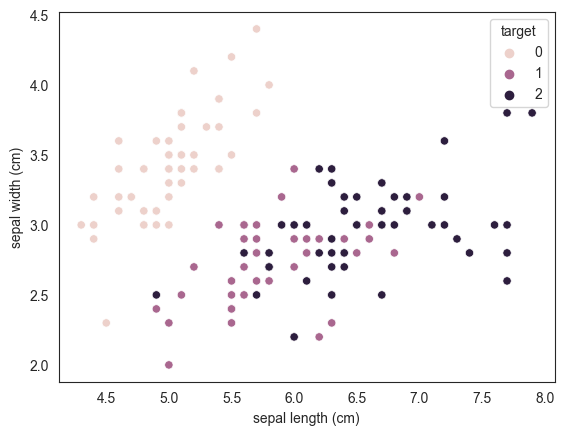

In [19]:
sns.set_style("white")
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='target', data=df)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = df.drop('target', axis=1)
y = df.target

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

KNN Classifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
knn_model = KNeighborsClassifier(n_neighbors=3)

In [37]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [38]:
knn_model.score(X_test, y_test)

0.9

In [39]:
from sklearn.metrics import confusion_matrix
cme = confusion_matrix(y_test, knn_model.predict(X_test))

<AxesSubplot:>

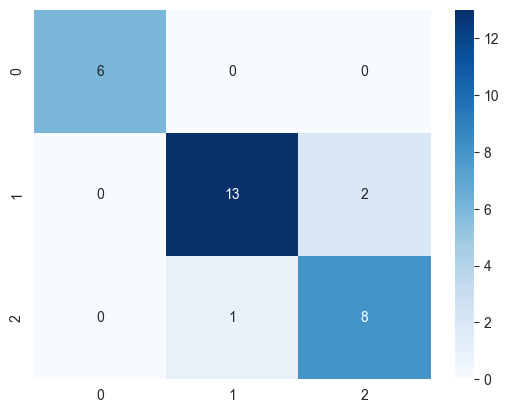

In [41]:
sns.heatmap(cme, annot=True, fmt='d',cmap='Blues')

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, knn_model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.93      0.87      0.90        15
           2       0.80      0.89      0.84         9

    accuracy                           0.90        30
   macro avg       0.91      0.92      0.91        30
weighted avg       0.90      0.90      0.90        30

